(60000, 784)
(10000, 784)


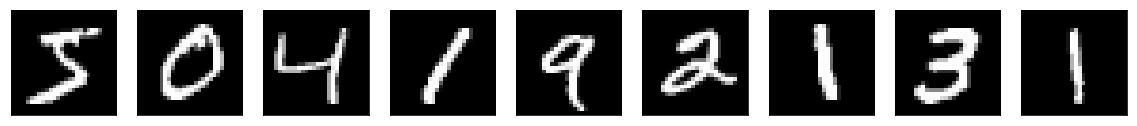

[0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0

60000/60000 [==============================] - 4s 69us/step - loss: 0.0085
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0052
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0052
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0051
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0051
784
49


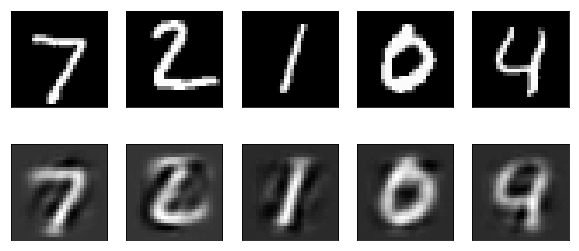

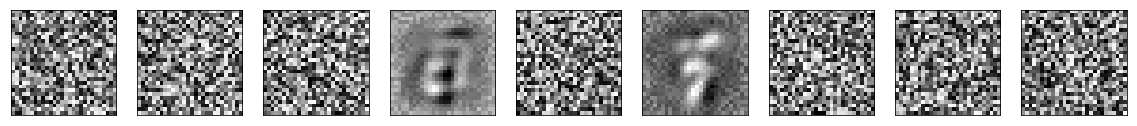

In [19]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def plot_autoencoder_outputs(autoencoder, x_test, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

    (x_train, y_train), (x_test, y_test) = mnist.load_data()

def own_kullback_leibler_divergence(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    return K.sum(y_true * K.log(y_true / y_pred), axis=-1)

def own_mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def own_loss(y_true, y_pred):
    return own_kullback_leibler_divergence(y_true, y_pred)*0.5+own_mean_squared_error(y_true, y_pred)


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = 0.25 + x_train.astype('float32') / 255.0 / 2.0
x_test = 0.25 + x_test.astype('float32') / 255.0 / 2.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

input_size = 784
code_size = 49

input_img = Input(shape=(input_size,))
code = Dense(code_size, use_bias = False, activation='relu')(input_img)
output_img = Dense(input_size, use_bias = False, activation='sigmoid')(code)

n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print(x_train[0])

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, epochs=5)

for i in range(len(autoencoder.get_weights())):
    print(len(autoencoder.get_weights()[i]))

plot_autoencoder_outputs(autoencoder, x_test, 5, (28, 28))

weights = autoencoder.get_weights()[0].T

n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


784
pups
pups


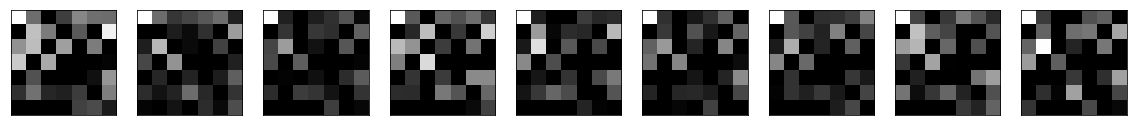

In [20]:
    input_img_2 = Input(shape=(input_size,))
    code_2 = Dense(code_size, activation='relu', use_bias = False)(input_img_2)
    output_img_2 = Dense(input_size, activation='sigmoid', use_bias = False)(code)

    #hidden_1_2.set_weights(weights)

    autoencoder_2 = Model(input_img_2, code_2)
    coding = autoencoder_2.predict(x_test)
    
    for i in range(len(autoencoder_2.get_weights())):
        print(len(autoencoder_2.get_weights()[i]))
    
    for i in range(2):
        autoencoder_2.layers[i].set_weights(autoencoder.layers[i].get_weights())
        print('pups')

    n = 9
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(coding[i].reshape(7, 7))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


In [21]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 49)                38416     
_________________________________________________________________
dense_20 (Dense)             (None, 784)               38416     
Total params: 76,832
Trainable params: 76,832
Non-trainable params: 0
_________________________________________________________________


In [22]:
print(len(autoencoder.get_weights()[0]))

784


In [23]:
print(len(autoencoder.get_weights()[0][0]))

49


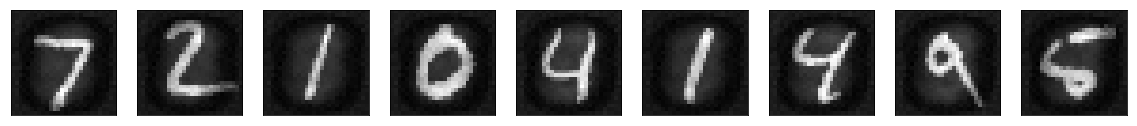

In [24]:
a = np.zeros((784))
w = autoencoder.get_weights()[0]

for i in range(784):
    for j in range(49):
        a[i]+=w[i][j]**2
        
a=np.sqrt(a)

ww = np.zeros((len(x_test),784))

for i in range(len(x_test)):
    for j in range(784):
        ww[i][j]=x_test[i][j]*a[j]
        
n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(ww[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


212 0.7909768694427148
240 0.7818908211927892
213 0.7729413584900173
241 0.7542402756202284
211 0.7540307990420791
270 0.744051720844284
239 0.7394382398530129
268 0.7355785886596135
242 0.7345400392435485
214 0.7331274679365282
[212, 240, 213, 241, 211, 270, 239, 268, 242, 214]


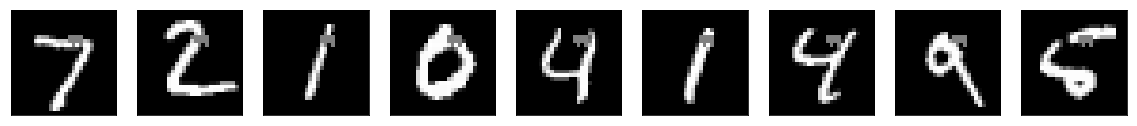

In [25]:
b = np.argsort(a)
c = []
for i in range(10):
    c.append(b[-i-1])
    print(b[-i-1], a[b[-i-1]])

print(c)

x_temp = x_test

for i in range(len(x_test)):
    for j in c:
        x_temp[i][j]=0.5
        
n = 9
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_temp[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


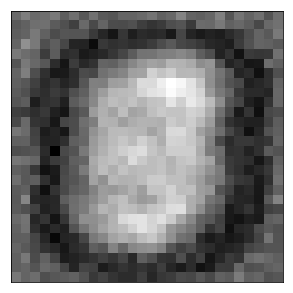

In [26]:
n = 1
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(a.reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
print(a)

[0.47711522 0.51837315 0.47617459 0.48536756 0.5082377  0.44952189
 0.48630436 0.4361785  0.49124546 0.44185342 0.43195409 0.46473241
 0.46377549 0.47582205 0.4959488  0.45644867 0.47018267 0.53083826
 0.46137884 0.45355742 0.46917247 0.52229881 0.43221541 0.49758276
 0.46448634 0.48990734 0.43023199 0.4845874  0.44180984 0.45749556
 0.4879226  0.49045132 0.44580823 0.42189236 0.38796644 0.47464644
 0.40861367 0.46469857 0.41459204 0.41107016 0.42253416 0.38533286
 0.3626833  0.37709314 0.41811435 0.43060408 0.37614628 0.478668
 0.4764777  0.50946762 0.46076754 0.47198946 0.44922539 0.40610382
 0.47680521 0.49327638 0.45015624 0.46260423 0.50943945 0.45768587
 0.4133661  0.43218994 0.42957639 0.42980085 0.37500312 0.33420641
 0.2973109  0.36847897 0.3176108  0.34400341 0.33596732 0.34528009
 0.30743732 0.4006178  0.33245414 0.30784115 0.32628488 0.31589361
 0.34536251 0.36904474 0.41732029 0.46380015 0.44399512 0.51039233
 0.4628521  0.55655298 0.50792794 0.42087836 0.45089478 0.404086